In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("New Dataset 5000.csv")

In [3]:
data

StationId         Datetime  PM2.5    PM10     NO     NO2    NOx    NH3  \
0        TG002   5/14/2018 0:00  35.25   88.50   2.12   33.10  19.30  14.10   
1        TG002   5/14/2018 1:00  32.00   73.50   2.17   20.30  12.60  13.80   
2        TG002   5/14/2018 2:00  20.50   58.00   3.00   17.35  11.65  13.48   
3        TG002   5/14/2018 3:00  21.00   50.00   2.73   18.28  11.93  13.50   
4        TG002   5/14/2018 4:00  18.50   43.50   2.20   16.38  10.45  15.13   
...        ...              ...    ...     ...    ...     ...    ...    ...   
5086     TG002  1/31/2019 19:00  40.75   93.75   3.55   91.53  51.58  17.98   
5087     TG002  1/31/2019 20:00  64.25  151.75   4.97  121.20  68.53  21.15   
5088     TG002  1/31/2019 21:00  82.25  179.50  17.82  142.17  90.10  20.10   
5089     TG002  1/31/2019 22:00  78.25  165.00  22.60  144.02  94.95  20.75   
5090     TG002  1/31/2019 23:00  75.50  160.75  12.47  134.22  81.55  21.70   

        CO   SO2     O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0     0.96  1.97  67.25     4.98     7.43    2.70  168   Moderate  
1     0.17  2.77  80.75     3.40     4.27    1.57  124   Moderate  
2     1.53  2.95  77.22     2.02     2.55    1.18  124   Moderate  
3     2.96  2.02  36.35     1.42     1.57    0.80  124   Moderate  
4     3.49  2.20  70.90     1.20     1.10    1.03  124   Moderate  
...    ...   ...    ...      ...      ...     ...  ...        ...  
5086  0.87  3.45  42.12     3.30     7.35    3.00  106   Moderate  
5087  1.21  3.00  13.75     6.22    16.48    8.20  106   Moderate  
5088  1.48  4.05   2.42     8.55    23.40   12.93  106   Moderate  
5089  1.45  3.97   1.20     9.62    24.93   15.65  107   Moderate  
5090  1.29  2.00   4.97     9.65    22.52   15.62  108   Moderate  

[5091 rows x 16 columns]

In [4]:
df = data.drop(['StationId', 'Datetime', 'PM2.5', 'PM10', 'AQI_Bucket'], axis=1)

In [5]:
df.tail()

NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  \
5086   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30     7.35   
5087   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22    16.48   
5088  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55    23.40   
5089  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62    24.93   
5090  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65    22.52   

      Xylene  AQI  
5086    3.00  106  
5087    8.20  106  
5088   12.93  106  
5089   15.65  107  
5090   15.62  108

In [6]:
df.columns=['NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

NO     NO2    NOx    NH3    CO   SO2     O3  Benzene  Toluene  \
5086   3.55   91.53  51.58  17.98  0.87  3.45  42.12     3.30     7.35   
5087   4.97  121.20  68.53  21.15  1.21  3.00  13.75     6.22    16.48   
5088  17.82  142.17  90.10  20.10  1.48  4.05   2.42     8.55    23.40   
5089  22.60  144.02  94.95  20.75  1.45  3.97   1.20     9.62    24.93   
5090  12.47  134.22  81.55  21.70  1.29  2.00   4.97     9.65    22.52   

      Xylene  AQI  
5086    3.00  106  
5087    8.20  106  
5088   12.93  106  
5089   15.65  107  
5090   15.62  108

In [7]:
X = df.loc[:, 'NO':'Xylene'].values
y = df['AQI'].values

In [8]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [9]:
# COvariance matrix

import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00019646  0.33629993  0.60819     0.12478496  0.33434546  0.06893179
  -0.17353783  0.35952751  0.29052589  0.39498179]
 [ 0.33629993  1.00019646  0.95180691  0.56778598  0.62938985  0.41621007
  -0.06808116  0.7453067   0.6095303   0.70238404]
 [ 0.60819     0.95180691  1.00019646  0.51820875  0.64131299  0.37264625
  -0.11185871  0.74574032  0.60837258  0.72126447]
 [ 0.12478496  0.56778598  0.51820875  1.00019646  0.43778267  0.31927145
   0.30422181  0.59247188  0.47082993  0.35179404]
 [ 0.33434546  0.62938985  0.64131299  0.43778267  1.00019646  0.1846075
   0.09574923  0.56839049  0.45755021  0.53172383]
 [ 0.06893179  0.41621007  0.37264625  0.31927145  0.1846075   1.00019646
   0.24319169  0.41650239  0.38614127  0.17990277]
 [-0.17353783 -0.06808116 -0.11185871  0.30422181  0.09574923  0.24319169
   1.00019646  0.00348086 -0.03954711 -0.1388311 ]
 [ 0.35952751  0.7453067   0.74574032  0.59247188  0.56839049  0.41650239
   0.00348086  1.00019646  0.8665

In [10]:
# Eigen Vector and eigen values on standarized data x // covariance matrix

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [11]:
# Eigen value and vector on correlation matrix

cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [12]:
# eigen value on original x

cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.19409922e-01  3.89778417e-01 -2.40704428e-01 -3.85584476e-01
   6.25111175e-01 -2.10257008e-02  8.67759618e-02 -8.53138791e-02
  -3.99343330e-01 -1.66818402e-01]
 [-3.96622389e-01  1.84027550e-02 -6.24942354e-01  2.32660343e-02
  -1.71146979e-02 -1.05291558e-02 -4.18706975e-01  2.48436099e-01
   4.54766298e-01 -8.36993228e-02]
 [-4.05762227e-01  1.41700392e-01  7.42618419e-01 -1.07607082e-01
   1.87715293e-01 -1.14617198e-02 -3.25140766e-01  1.81722156e-01
   2.52522850e-01 -1.19753758e-01]
 [-2.83960814e-01 -3.79954398e-01  2.65502669e-03 -1.97385887e-01
  -2.30770763e-01 -1.43396196e-01  3.47415008e-01 -1.27665605e-01
   2.57732754e-02 -7.24261764e-01]
 [-3.14791219e-01 -1.29291446e-02 -2.30486922e-03 -4.56546556e-01
  -1.62930769e-01 -2.57750261e-02  1.79396187e-01 -5.41614410e-01
   2.93178664e-01  5.03592670e-01]
 [-2.01573118e-01 -4.10866915e-01  8.41526849e-04  4.90635326e-01
   6.06265034e-01 -5.66568417e-02  3.14891970e-01 -1.02201688e-01
   2.12768036e-01  

In [13]:
# SVD

u,s,v = np.linalg.svd(X_std.T)
u

array([[-2.19409922e-01,  3.89778417e-01,  3.85584476e-01,
        -6.25111175e-01, -3.99343330e-01, -1.66818402e-01,
        -8.53138791e-02,  8.67759618e-02, -2.10257008e-02,
         2.40704428e-01],
       [-3.96622389e-01,  1.84027550e-02, -2.32660343e-02,
         1.71146979e-02,  4.54766298e-01, -8.36993228e-02,
         2.48436099e-01, -4.18706975e-01, -1.05291558e-02,
         6.24942354e-01],
       [-4.05762227e-01,  1.41700392e-01,  1.07607082e-01,
        -1.87715293e-01,  2.52522850e-01, -1.19753758e-01,
         1.81722156e-01, -3.25140766e-01, -1.14617198e-02,
        -7.42618419e-01],
       [-2.83960814e-01, -3.79954398e-01,  1.97385887e-01,
         2.30770763e-01,  2.57732754e-02, -7.24261764e-01,
        -1.27665605e-01,  3.47415008e-01, -1.43396196e-01,
        -2.65502669e-03],
       [-3.14791219e-01, -1.29291446e-02,  4.56546556e-01,
         1.62930769e-01,  2.93178664e-01,  5.03592670e-01,
        -5.41614410e-01,  1.79396187e-01, -2.57750261e-02,
         2.

In [14]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [15]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
5.197067527993019
1.4790219555014197
0.8307450519490805
0.7509509109251076
0.5636988437019086
0.4969229973353462
0.37560800277983125
0.2159123202437456
0.0896224116810134
0.0004499778895284624


In [16]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

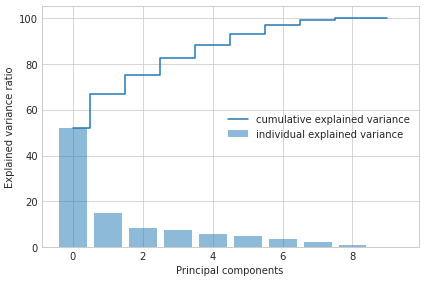

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(10), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [18]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                      eig_pairs[1][1].reshape(10,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.21940992  0.38977842]
 [-0.39662239  0.01840276]
 [-0.40576223  0.14170039]
 [-0.28396081 -0.3799544 ]
 [-0.31479122 -0.01292914]
 [-0.20157312 -0.41086692]
 [ 0.00156891 -0.68575153]
 [-0.40044602 -0.04296907]
 [-0.35198061 -0.03194383]
 [-0.35397483  0.20295094]]


In [19]:
Y = X_std.dot(matrix_w)
Y

array([[-0.19765723, -0.5380899 ],
       [ 1.21126969, -0.93313901],
       [ 0.41448767, -0.84852628],
       ...,
       [-6.73630432,  2.48391753],
       [-7.47823741,  2.92194657],
       [-6.45570324,  2.19190377]])

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [21]:
data = pd.DataFrame(Y, columns=['col1', 'col2'])


In [22]:
data

col1      col2
0    -0.197657 -0.538090
1     1.211270 -0.933139
2     0.414488 -0.848526
3    -0.606004  0.056695
4    -1.009638 -0.875476
...        ...       ...
5086 -1.835952  0.170261
5087 -4.307215  1.096530
5088 -6.736304  2.483918
5089 -7.478237  2.921947
5090 -6.455703  2.191904

[5091 rows x 2 columns]

In [23]:
X= data.values
y = df['AQI'].values

In [24]:
X.shape

(5091, 2)

In [25]:
y.shape

(5091,)

In [26]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4072, 2)
(4072,)
(1019, 2)
(1019,)


In [28]:
X_train

array([[-0.00620929,  0.05929597],
       [ 1.217397  ,  1.24713775],
       [-2.06033843,  0.6760539 ],
       ...,
       [ 0.06393472,  0.53212023],
       [-2.42565013,  0.38135143],
       [ 2.39906398, -0.16249411]])

In [29]:
X_test

array([[ 1.24049847, -0.25122645],
       [-0.86177543,  0.76340199],
       [ 1.58633493,  0.76863872],
       ...,
       [-1.29948588,  0.10108666],
       [-0.34858389,  0.60811756],
       [ 0.77750076,  0.8929486 ]])

In [30]:
y_train

array([ 92,  33,  81, ...,  92, 127, 162], dtype=int64)

In [31]:
y_test

array([59, 65, 45, ..., 94, 60, 36], dtype=int64)

In [32]:
sc=StandardScaler()

scaler = sc.fit(X_train)

trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [33]:
trainX_scaled

array([[ 0.00137509,  0.03868376],
       [ 0.53806473,  1.01159318],
       [-0.89959267,  0.5438433 ],
       ...,
       [ 0.03214117,  0.4259535 ],
       [-1.05982314,  0.30246535],
       [ 1.05635924, -0.14297482]])

In [34]:
testX_scaled

array([[ 0.54819734, -0.21565161],
       [-0.37388735,  0.61538631],
       [ 0.69988571,  0.61967549],
       ...,
       [-0.56587285,  0.0729127 ],
       [-0.14879486,  0.4881996 ],
       [ 0.34512051,  0.72149229]])

In [35]:
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=3, input_dim=2, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=128, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(trainX_scaled, y_train ,batch_size = 20, epochs = 100, verbose=1)

Epoch 1/100
204/204 [==============================] - 0s 1ms/step - loss: 9002.7217
Epoch 2/100
204/204 [==============================] - 0s 1ms/step - loss: 3557.3701
Epoch 3/100
204/204 [==============================] - 0s 1ms/step - loss: 1398.5872
Epoch 4/100
204/204 [==============================] - 0s 1ms/step - loss: 793.9663
Epoch 5/100
204/204 [==============================] - 0s 1ms/step - loss: 591.4784
Epoch 6/100
204/204 [==============================] - 0s 1ms/step - loss: 514.4872
Epoch 7/100
204/204 [==============================] - 0s 1ms/step - loss: 475.9206
Epoch 8/100
204/204 [==============================] - 0s 1ms/step - loss: 451.3461
Epoch 9/100
204/204 [==============================] - 0s 1ms/step - loss: 433.3929
Epoch 10/100
204/204 [==============================] - 0s 1ms/step - loss: 419.6954
Epoch 11/100
204/204 [==============================] - 0s 1ms/step - loss: 411.2372
Epoch 12/100
204/204 [==============================] - 0s 1ms/step - l

In [36]:
model.evaluate(testX_scaled, y_test)

32/32 [==============================] - 0s 2ms/step - loss: 413.0724


413.0723571777344

In [37]:
Predictions = model.predict(testX_scaled)  # Flatten the predictions


In [38]:
df_testY = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(Predictions)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual   Predicted
0         59   84.432457
1         65   86.644753
2         45   54.249680
3        142  124.966476
4        126  107.400772
...      ...         ...
1014     139  126.707413
1015      45   46.752327
1016      94  118.332138
1017      60   83.843811
1018      36   62.568649

[1019 rows x 2 columns]

In [39]:
APE = 100 * (abs(df_results['Actual'] - df_results['Predicted']) / df_results['Actual'])
df_results['APE'] = APE

# Calculate the accuracy of the ANN model
accuracy = 100 - np.mean(APE)
print('The Accuracy of ANN model is:', accuracy)
df_results.head()

The Accuracy of ANN model is: 79.15396281697677


Actual   Predicted        APE
0      59   84.432457  43.105859
1      65   86.644753  33.299619
2      45   54.249680  20.554843
3     142  124.966476  11.995439
4     126  107.400772  14.761292

In [40]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('r2 score :', r2_score(y_test, Predictions))


Mean Absolute Error: 15.10586030490265
Mean Squared Error: 413.07236614297557
Root Mean Squared Error: 20.324181807467074
Mean Absolute Percentage Error: 0.20846037183023194
r2 score : 0.7436858773024109


In [42]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[10, 20, 30, 40, 50]
    epoch_list  =   [10, 50, 100, 200,2000]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=3, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData = pd.concat([SearchResultsData, pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]], columns=['TrialNumber', 'Parameters', 'Accuracy'])], ignore_index=True)

    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 10 - epochs: 10 Accuracy: 33.9143956166659
2 Parameters: batch_size: 10 - epochs: 50 Accuracy: 32.06973228063735
3 Parameters: batch_size: 10 - epochs: 100 Accuracy: 35.053239846632934
4 Parameters: batch_size: 10 - epochs: 200 Accuracy: 32.86048019951316
5 Parameters: batch_size: 10 - epochs: 2000 Accuracy: 33.915524698153234
6 Parameters: batch_size: 20 - epochs: 10 Accuracy: 33.32695174204106
7 Parameters: batch_size: 20 - epochs: 50 Accuracy: 32.30306889128167
8 Parameters: batch_size: 20 - epochs: 100 Accuracy: 33.18306235786598
9 Parameters: batch_size: 20 - epochs: 200 Accuracy: 32.33879074297279
10 Parameters: batch_size: 20 - epochs: 2000 Accuracy: 33.121704190259535
11 Parameters: batch_size: 30 - epochs: 10 Accuracy: 33.38590109260785
12 Parameters: batch_size: 30 - epochs: 50 Accuracy: 33.070145940722284
13 Parameters: batch_size: 30 - epochs: 100 Accuracy: 31.746687196304478
14 Parameters: batch_size: 30 - epochs: 200 Accuracy: 32.17884026532458
1

<AxesSubplot:xlabel='Parameters'>

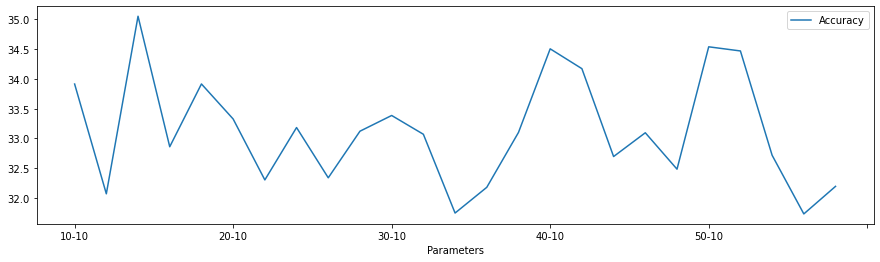

In [43]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [44]:
# Fitting the ANN to the Training set
history = model.fit(trainX_scaled, y_train ,batch_size = 10, epochs = 100, validation_data=(testX_scaled, y_test), verbose=0)

# Generating Predictions on testing data
Predictions = model.predict(testX_scaled)  # Flatten the predictions


In [45]:
df_testY = pd.DataFrame(y_test)
df_y_pred = pd.DataFrame(Predictions)

df_testY.reset_index(drop=True, inplace=True)
df_y_pred.reset_index(drop=True, inplace=True)

df_results = pd.concat([df_testY, df_y_pred], axis=1)
df_results.columns = ['Actual', 'Predicted']

df_results

Actual   Predicted
0         59   82.998474
1         65   86.389160
2         45   53.032597
3        142  123.863922
4        126  106.795380
...      ...         ...
1014     139  126.065277
1015      45   45.321014
1016      94  117.677994
1017      60   82.715515
1018      36   61.502171

[1019 rows x 2 columns]

In [46]:
APE = 100 * (abs(df_results['Actual'] - df_results['Predicted']) / df_results['Actual'])
df_results['APE'] = APE

# Calculate the accuracy of the ANN model
accuracy = 100 - np.mean(APE)
print('The Accuracy of ANN model is:', accuracy)
df_results.head()

The Accuracy of ANN model is: 79.64094293742566


Actual   Predicted        APE
0      59   82.998474  40.675380
1      65   86.389160  32.906400
2      45   53.032597  17.850215
3     142  123.863922  12.771886
4     126  106.795380  15.241762

In [47]:
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('r2 score :', r2_score(y_test, Predictions))


Mean Absolute Error: 14.981227395578971
Mean Squared Error: 411.2541869238893
Root Mean Squared Error: 20.279403021881322
Mean Absolute Percentage Error: 0.20359057062574334
r2 score : 0.7448140694780303


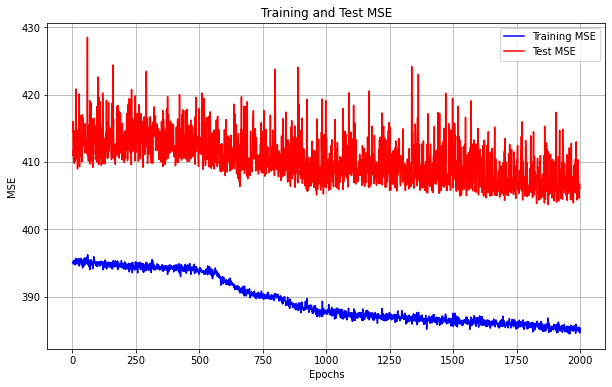

In [48]:
history = model.fit(trainX_scaled, y_train, batch_size=10, epochs=2000, verbose=0, validation_data=(testX_scaled, y_test))

train_mse = history.history['loss']
test_mse = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_mse) + 1)

# Plotting the MSE for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, test_mse, 'r', label='Test MSE')
plt.title('Training and Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

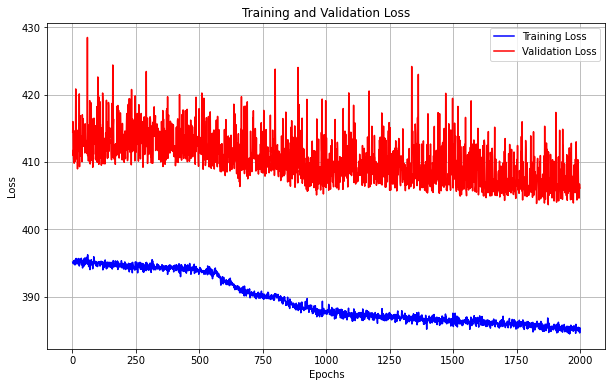

In [49]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Creating a list of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the loss for training and testing data
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, test_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()